# Linear Regression: Premade estimator and input pipeline

This notebook shows how to use input pipelines with a premade estimator. You can monitor the training live with tensorboard!
```
tensorboard --logdir=/path/to/summary
```

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.VERSION

'1.12.0'

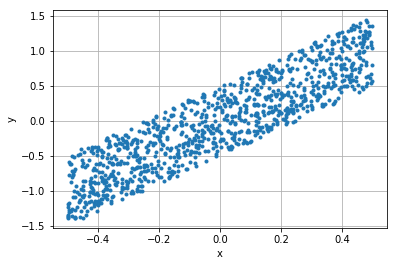

In [3]:
# Create a linear function with noise as our data
nsamples = 1000
ref_slope = 2.0
ref_offset = 0.0
noise = np.random.random((nsamples, 1)) - 0.5    # -0.5 to center the noise
x_train = np.random.random((nsamples, 1)) - 0.5  # -0.5 to center x around 0
y_train = ref_slope * x_train + ref_offset + noise

plt.plot(x_train, y_train, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [4]:
def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices(({'x':x_train}, y_train))
    dataset = dataset.batch(200)
    dataset = dataset.repeat(100)
    iterator = dataset.make_one_shot_iterator()
    x, y = iterator.get_next()
    return x, y

In [5]:
x = tf.feature_column.numeric_column('x', dtype=tf.float64, shape=())

In [6]:
estimator = tf.estimator.LinearRegressor(feature_columns=[x],
                                         optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001),
                                         model_dir='./summary')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './summary', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5703b8ada0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [7]:
! rm -r summary/

In [8]:
train = estimator.train(input_fn=train_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ./summary/model.ckpt.
INFO:tensorflow:loss = 92.86511, step = 1
INFO:tensorflow:global_step/sec: 706.27
INFO:tensorflow:loss = 16.158916, step = 101 (0.142 sec)
INFO:tensorflow:global_step/sec: 891.936
INFO:tensorflow:loss = 15.955229, step = 201 (0.112 sec)
INFO:tensorflow:global_step/sec: 898.436
INFO:tensorflow:loss = 15.951011, step = 301 (0.113 sec)
INFO:tensorflow:global_step/sec: 365.514
INFO:tensorflow:loss = 15.950882, step = 401 (0.277 sec)
INFO:tensorflow:Saving checkpoints for 500 into ./summary/model.ckpt.
INFO:tensorflow:Loss for final step: 16.55568.


In [9]:
estimator.get_variable_names()

['global_step',
 'linear/linear_model/bias_weights',
 'linear/linear_model/x/weights']

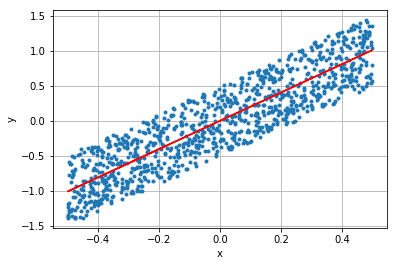

In [10]:
slope =  estimator.get_variable_value('linear/linear_model/x/weights')
offset = estimator.get_variable_value('linear/linear_model/bias_weights')

plt.plot(x_train, y_train, '.')
plt.plot(x_train, slope * x_train + offset, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()